### Car Price Predition With Machine Learning

Task Given
The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. So if you want to learn how to train a car price prediction model then this project is for you.


In [1]:
!pip install summarytools

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from summarytools import dfSummary

In [3]:
data= pd.read_csv("/content/car data.csv")

# Basic Check

In [4]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
data.shape

(301, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.642584,0.32,1.2,6.4,9.9,92.6
Driven_kms,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [10]:
dfSummary(data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Car_Name[object],1. city2. corolla altis3. verna4. fortuner5. brio6. ciaz7. innova8. i209. grand i1010. jazz11. other,26 (8.6%)16 (5.3%)14 (4.7%)11 (3.7%)10 (3.3%)9 (3.0%)9 (3.0%)9 (3.0%)8 (2.7%)7 (2.3%)182 (60.5%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAD/ElEQVR4nO3dT2rbaACH4c+DKdONTQjkMDlEDzuH8G1CiBbT0o1nMZsG/4kN0huInmddgygvEhLfr90cj8cBhb8++wJYD7GRERsZsZERGxmxkREbGbGRERuZzRjj+xjj252/+308Hn8ucD18YdvHx8cfu93u4Z4fTdP0utls/hEc99judruH5+fnn/v9/tctP3h7e/v7cDg8vLy8fBtjiI2bbccYY7/f/3p6evr3jt99X+h6+MK8IJARGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERG5ntGP+fUbv1B/f8WfjTdpqm18Ph8DDuOKM2TdPrGOP3cpfFV2SDQGbjn8yicsudzV2MWXy4rrKkYi5X11WWVMzplnWVJRWz8FGXjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzNXBi3ELc/pw8GLcwlwcCydj8ELmozubuxqzuTp4MXZhThcHL8YuzO2jwYuxC7PxUZeM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3MxcGLsQtzuzp4MXZhTo6FkzF4IeMFgcy1x6hHKLO6uK6yrGJuZ9dVllUs4dq6yrKKWXlBICM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI3N2XWVZxRIurqssq5ibY+FkrKvIXLqzuasxu7ODF2MXlnAyeDF2YSmXBi/GLszOR10yYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyJ4MXYxeWcnbwYuzCEhwLJ2PwQsadjYzBCxmDFzIGL2R81CUjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjLWVWSsq8jYIJCxriLjzkbGuoqMdRUZ6yoyPuqSERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXghY/BCxrFwMgYvZNzZyBi8kDF4IWPwQsZHXTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjIGL2QMXsg4Fk7G4IWMFwQy5x6jHqEs4mRdZVnFUt6tqyyrWNK5dZVlFYvwgkBGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbm3brKsoolnayrLKtYimPhZKyryLizkTF4IWPwQsbghYyPumTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGQMXsgYvJBxLJyMwQuZS/9RGstb3RPkZPBCY43DoneDl8++mLVY67Do3OCFxuqGRT7qkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkXk3eKGx1r/vk8ELjTUOixwL/zyrOxZu8ELGCwIZsZERGxmxkREbGbGRERsZsZERG5n/ACU2TuJmAtpzAAAAAElFTkSuQmCC"">",0(0.0%)
2,Year[int64],Mean (sd) : 2013.6 (2.9)min < med < max:2003.0 < 2014.0 < 2018.0IQR (CV) : 4.0 (696.4),16 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC0ElEQVR4nO3cP2/aQBiA8fcggPkjE0QDG0sHhkoMjHyIfth+hETiEzB0YajYEAgZ4YZiDB2aShmSkLNBd6/1/OYcvuGxFd/ZNufzWQDflVxPAPiMO9cTgD+MMXURqeb4icP5fH6+1nxeI1SIyL9Iu93u9zAMO1l/Y7vdbowxP24RK6Hiv2oYhp3JZPLcbrf3toOjKAqm02lnvV5XRYRQcVvtdnvf6/V+Zxxev+pkXuFmCioQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECX/PzjM8f03WJUD3i+8d0XSJUv3j9MV2XCNVDvn5M1yVupqACoUIFQoUKhAoVCBUqECpUIFSowDpqwaRpWhGR0BhjOzQ8nU6VG0zpKgi1QOI4riRJMhoMBuVyuWy1s5UkSZCm6bf9fv8oIpk2G3KcJCIXnlEg1AI5HA53QRA0xuPxvt/vb2zGLhaLzmw2axyPx3KWY+c5SUQuP6NAqAXUbDatt2A3m02urdc8J8lnnlEgVFxVlpPkxYcnCnf9UIFQoQKhQgVChQqEChW4639HzpfsCvmCnUuE+oa8L9kV9QU7lwj1bZlfsouiKHh6euqt1+svxpit5XG93m93iVA/kOUlO9f77UVFqFfmcr+9yAj1RlzstxcZy1NQgVChAqFCBa//R8256F4SkVPGsSwTecbbUPMsuqdpWonj+Gur1ZqXSqXEdjzLRP65GKrLq1qr1epNJpOt7aL7yzLPw3g8/mm7RPRqPMtEHvkwVB+uarVa7THrMk/Wp81ZJvLPpStqNQzDzmg0knq9/sfmh1erVTCfzx+Gw+Gv+/v7ne3EXsY3oihqLpfLg83Y3W4XiIjEcRwsl8uG7bHzjHc1VvOxoygKLv3NX4ICcCsQBqo5AAAAAElFTkSuQmCC"">",0(0.0%)
3,Selling_Price[float64],Mean (sd) : 4.7 (5.1)min < med < max:0.1 < 3.6 < 35.0IQR (CV) : 5.1 (0.9),156 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACjklEQVR4nO3dO2/aYBSH8fNyqyHU5pLLxtKBrUPGLJ269sN27Q4jn4ChG4piESNcKBalQ0tVqVLAr6Hhbz2/OcdmeAxyEo7dbrcz4NJVXvsFAMeoHfoB51zTzBqex9/sdruV5yzwx4uhOuea/X7/UxiGXZ+DLxaLuXPuM7GiqEPvqI0wDLsPDw+rKIrWeQ6cJEkwGo26cRw3zIxQUcjBj34zsyiK1re3t988jt/0mAH+wc0UJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBz1vX5f2+22bmahc873EKwEgpmdMdQ0TetZlr0fDAbVarWaa8vKHiuBsHe2UDebTS0Igtb9/f367u5unneelUD421k/+s3Mrq6ufNcBmbESCL9xMwUJhAoJhAoJhAoJhAoJhAoJh

In [11]:
data.duplicated().sum()

2

In [12]:
data= data.drop_duplicates()

# Data Visualization :- EDA

In [13]:
cat_col = [col for col in data.columns if data[col].dtype == 'object']
num_col = [col for col in data.columns if data[col].dtype != 'object']

In [31]:
import plotly.express as px
for i in data:
  plt.figure(figsize=(10,5))
  fig = px.histogram(data_frame=data, y=i)
  fig.show()
  plt.show()

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

In [25]:
# KM driven and selling price
px.scatter(data, x='Driven_kms', y='Selling_Price')

In [26]:
# Present Prrice and Selling Price
px.scatter(data, x='Present_Price', y='Selling_Price')

In [ ]:
avg_unemployment_rate=data.groupby('Region')['Unemployment Rate'].mean()
state_with_highest_unemployment=avg_unemployment_rate.max()
Highest_unemployment_rate=avg_unemployment_rate.idxmax()
print(f"state  with  high employment : {Highest_unemployment_rate}\nhigh employment rate :{state_with_highest_unemployment}")



In [42]:
# Lowest Selling price of car
Avg_selling_price = data.groupby('Car_Name')['Selling_Price'].mean()
Car_with_lowest_selling_price = Avg_selling_price.idxmin()
lowest_selling_price = Avg_selling_price.min()
print(f"Car with lowest selling price: {Car_with_lowest_selling_price}\nLowest selling price: {lowest_selling_price}")

Car with lowest selling price: Bajaj Discover 125
Lowest selling price: 0.175


In [43]:
# Highest Selling price of car
Car_with_highest_selling_price = Avg_selling_price.idxmax()
highest_selling_price = Avg_selling_price.max()
print(f"Car with highest selling price: {Car_with_highest_selling_price}\nHighest selling price: {highest_selling_price}")

Car with highest selling price: land cruiser
Highest selling price: 35.0


In [41]:
# Car selling price with car name
px.bar(data, y='Car_Name', x='Selling_Price')

# Top 10 Cars

In [44]:
Avg_selling_price.sort_values(ascending=False).head(10)

,Selling_Price
Car_Name,
land cruiser,35.000000
fortuner,18.254000
innova,12.777778
creta,11.800000
elantra,11.600000
vitara brezza,9.250000
ciaz,7.472222
city,7.419231
corolla altis,7.183125


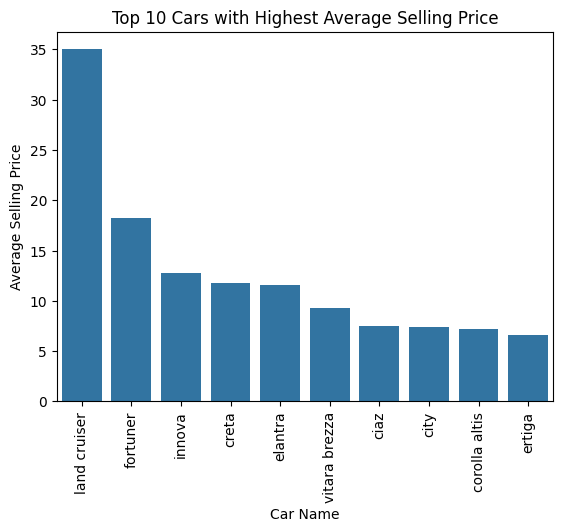

In [48]:
top_10_selling_prices = Avg_selling_price.sort_values(ascending=False).head(10)

sns.barplot(x=top_10_selling_prices.index, y=top_10_selling_prices.values)
plt.xticks(rotation=90)
plt.xlabel('Car Name')
plt.ylabel('Average Selling Price')
plt.title('Top 10 Cars with Highest Average Selling Price')
plt.show()

# Data Preprocessing

### Encoding

In [51]:
print(data['Fuel_Type'].value_counts())
print(data['Selling_type'].value_counts())
print(data['Transmission'].value_counts())

Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        193
Individual    106
Name: count, dtype: int64
Transmission
Manual       260
Automatic     39
Name: count, dtype: int64


In [53]:
# encoding "Fuel_Type" Column
data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
# encoding "Seller_Type" Column
data.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
# encoding "Transmission" Column
data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [54]:
data.drop('Car_Name',axis=1,inplace=True)

## Checking Corelation




<Axes: >

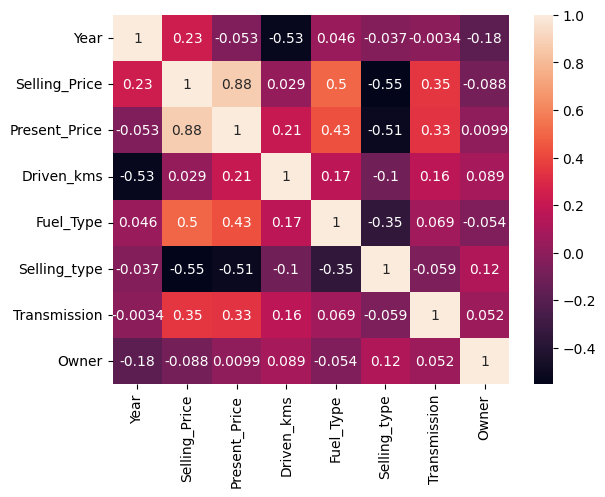

In [56]:
sns.heatmap(data.corr(),annot=True)

In [58]:
### Prediction

X = data.drop(['Selling_Price'],axis=1)
Y = data['Selling_Price']

In [59]:
# Split the data into training and testing sets
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Linear Regression Model

In [62]:
# Train the linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [64]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 6.675444100493416
R-squared: 0.7409934356413092


In [65]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [119]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train,y_train)
rf_pred=rf_regressor.predict(X_test)

In [123]:
mae = mean_absolute_error(y_test,rf_pred)
print("Mean Absolute Error (MAE):", mae)
print("==============================================================================")
mse = mean_squared_error(y_test,rf_pred)
print("Mean Squared Error (MSE):", mse)
print("==============================================================================")
r2 = r2_score(y_test,rf_pred)
print("R-squared (R2) Score:", r2)
print("==============================================================================")
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test,rf_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 1.4535516666666672
Mean Squared Error (MSE): 11.815079297833343
R-squared (R2) Score: 0.5415761033290483
Mean Absolute Percentage Error (MAPE): 37.64663920884167


In [124]:
RFR.score(X_train,y_train)

0.9806192231274489

Model is Overfitting in randomforest regressor

In [115]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=42,max_depth=5)
dt_regressor.fit(X_train, y_train)
dt_pred = dt_regressor.predict(X_test)

In [117]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test,dt_pred)
print("Mean Absolute Error (MAE):", mae)
print("==============================================================================")
mse = mean_squared_error(y_test,dt_pred)
print("Mean Squared Error (MSE):", mse)
print("==============================================================================")
r2 = r2_score(y_test,dt_pred)
print("R-squared (R2) Score:", r2)
print("==============================================================================")
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test,dt_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 1.1569725123179582
Mean Squared Error (MSE): 4.72625650180018
R-squared (R2) Score: 0.816621719786597
Mean Absolute Percentage Error (MAPE): 35.38000811696737
